# Web Analytics Assignmnet
## Zomato Data Analysis - Top 200 Restaurants
### Name : Roona Shree
### Roll no: E21019

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#REad the datasets
df = pd.read_csv("Bangalore_Restaurants.csv")

In [6]:
df.head(5)

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude
0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,"Indiranagar, Bangalore",4.9,2790.0,4.5,838.0,https://www.zomato.com/bangalore/burma-burma-i...,"607, Ground Floor, 12th Main, Hal 2nd Stage, I...",9.18043E+11,12.970394,77.644713
1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500,"Windmills Craftworks, Bangalore",4.9,6543.0,4.2,524.0,https://www.zomato.com/bangalore/windmills-cra...,"78, Immaine Epip Industrial Area, Whitefield B...",9.1888E+11,12.982413,77.721979
2,CTR Shri Sagar,South Indian,150,"Malleshwaram, Bangalore",4.9,4837.0,4.3,22100.0,https://www.zomato.com/bangalore/ctr-shri-saga...,"7th Cross, Margosa Road, Malleshwaram, Bangalore",9.18023E+11,12.998270,77.569455
3,Brahmin's Coffee Bar,South Indian,100,"Basavanagudi, Bangalore",4.9,2975.0,4.4,372.0,https://www.zomato.com/bangalore/brahmins-coff...,"Ranga Rao Road, Near Basavanagudi, Bangalore",9.19845E+11,12.954043,77.568865
4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,"Indiranagar, Bangalore",4.9,2575.0,4.4,1180.0,https://www.zomato.com/bangalore/milano-ice-cr...,"460, 2nd Cross, Krishna Temple Road, Indiranag...",9.18041E+11,12.979121,77.644039


# Data Preparations

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_Name        5109 non-null   object 
 1   Category               5109 non-null   object 
 2   Pricing_for_2          5109 non-null   int64  
 3   Locality               5109 non-null   object 
 4   Dining_Rating          5101 non-null   float64
 5   Dining_Review_Count    5101 non-null   float64
 6   Delivery_Rating        3697 non-null   float64
 7   Delivery_Rating_Count  5101 non-null   float64
 8   Website                5109 non-null   object 
 9   Address                5109 non-null   object 
 10  Phone_No               5109 non-null   object 
 11  Latitude               5109 non-null   float64
 12  Longitude              5109 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 519.0+ KB


In [9]:
df[["Dining_Rating","Delivery_Rating_Count","Delivery_Rating"]][df['Delivery_Rating'].isnull()].tail(5)

,Dining_Rating,Delivery_Rating_Count,Delivery_Rating
5099,3.3,0.0,NaN
5100,3.3,0.0,NaN
5102,3.3,0.0,NaN
5107,3.3,0.0,NaN
5108,3.3,11.0,NaN


### Missing Value imputations

In [11]:
#If the delivery rating count is not Zero and delivery rating is null than impute the missing value with the median rating
#Choosing median instead of mean - as mean is may overestimate the ratings
df.Delivery_Rating[(df['Delivery_Rating_Count'] >0) & (df['Delivery_Rating'].isnull())] =df['Delivery_Rating'].median()

In [16]:
#setting remainig null values in delivery rating to 0
df.Delivery_Rating=df["Delivery_Rating"].replace(to_replace = np.NaN,value =0)

In [14]:
#imputing missing delivery ratining count as median where delivery rating count is not zero
df.Delivery_Rating_Count[(df['Delivery_Rating_Count'].isnull() ) & (df['Delivery_Rating']>0)] =df['Delivery_Rating_Count'].median()

In [17]:
#setting remaining nulls to 0
df.Delivery_Rating_Count=df["Delivery_Rating_Count"].replace(to_replace = np.NaN,value =0)

In [18]:
df[["Dining_Rating","Dining_Review_Count","Delivery_Rating"]][df['Dining_Rating'].isnull()]

,Dining_Rating,Dining_Review_Count,Delivery_Rating
233,NaN,NaN,0.0
616,NaN,NaN,0.0
781,NaN,NaN,0.0
953,NaN,NaN,0.0
1288,NaN,NaN,0.0
1502,NaN,NaN,0.0
2766,NaN,NaN,3.2
3916,NaN,NaN,3.1


In [19]:
df.Dining_Rating=df["Dining_Rating"].replace(to_replace = np.NaN,value =0)
df.Dining_Review_Count=df["Dining_Review_Count"].replace(to_replace = np.NaN,value =0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_Name        5109 non-null   object 
 1   Category               5109 non-null   object 
 2   Pricing_for_2          5109 non-null   int64  
 3   Locality               5109 non-null   object 
 4   Dining_Rating          5109 non-null   float64
 5   Dining_Review_Count    5109 non-null   float64
 6   Delivery_Rating        5109 non-null   float64
 7   Delivery_Rating_Count  5109 non-null   float64
 8   Website                5109 non-null   object 
 9   Address                5109 non-null   object 
 10  Phone_No               5109 non-null   object 
 11  Latitude               5109 non-null   float64
 12  Longitude              5109 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 519.0+ KB


In [21]:
#removing duplicates
df = df.drop_duplicates(subset=['Restaurant_Name','Address'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 0 to 5108
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_Name        5003 non-null   object 
 1   Category               5003 non-null   object 
 2   Pricing_for_2          5003 non-null   int64  
 3   Locality               5003 non-null   object 
 4   Dining_Rating          5003 non-null   float64
 5   Dining_Review_Count    5003 non-null   float64
 6   Delivery_Rating        5003 non-null   float64
 7   Delivery_Rating_Count  5003 non-null   float64
 8   Website                5003 non-null   object 
 9   Address                5003 non-null   object 
 10  Phone_No               5003 non-null   object 
 11  Latitude               5003 non-null   float64
 12  Longitude              5003 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 547.2+ KB


In [23]:
#fixing the index of dataframe
new_index = list(range(0,5003))

In [24]:
df.reindex(new_index)

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude
0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500.0,"Indiranagar, Bangalore",4.9,2790.0,4.5,838.0,https://www.zomato.com/bangalore/burma-burma-i...,"607, Ground Floor, 12th Main, Hal 2nd Stage, I...",9.18043E+11,12.970394,77.644713
1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500.0,"Windmills Craftworks, Bangalore",4.9,6543.0,4.2,524.0,https://www.zomato.com/bangalore/windmills-cra...,"78, Immaine Epip Industrial Area, Whitefield B...",9.1888E+11,12.982413,77.721979
2,CTR Shri Sagar,South Indian,150.0,"Malleshwaram, Bangalore",4.9,4837.0,4.3,22100.0,https://www.zomato.com/bangalore/ctr-shri-saga...,"7th Cross, Margosa Road, Malleshwaram, Bangalore",9.18023E+11,12.998270,77.569455
3,Brahmin's Coffee Bar,South Indian,100.0,"Basavanagudi, Bangalore",4.9,2975.0,4.4,372.0,https://www.zomato.com/bangalore/brahmins-coff...,"Ranga Rao Road, Near Basavanagudi, Bangalore",9.19845E+11,12.954043,77.568865
4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400.0,"Indiranagar, Bangalore",4.9,2575.0,4.4,1180.0,https://www.zomato.com/bangalore/milano-ice-cr...,"460, 2nd Cross, Krishna Temple Road, Indiranag...",9.18041E+11,12.979121,77.644039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,Butter And Sauce,"North Indian, Chinese, Street Food, Biryani",400.0,"HSR, Bangalore",3.3,4.0,3.9,19.0,https://www.zomato.com/bangalore/butter-and-sa...,"757, Thara Vihar Food Court, 20th Main Road, G...",9.18073E+11,12.909674,77.644651
4999,New Ambur Hot Dum Biryani,"Biryani, North Indian",200.0,"Mysore Road, Bangalore",3.3,9.0,0.0,0.0,https://www.zomato.com/bangalore/new-ambur-hot...,"Near BHEL, Mysore Road, Bangalore",9.17975E+11,12.948205,77.535098
5000,South Spicy Bites,"Chinese, North Indian",400.0,"Hebbal, Bangalore",3.3,9.0,3.9,4.0,https://www.zomato.com/bangalore/south-spicy-b...,"168, RAMA Villa, 13th Main Road, Coffee Board ...",9.1998E+11,13.052611,77.604626
5001,Om Sri Vinayaka Chats,Street Food,150.0,"Banashankari, Bangalore",3.3,9.0,3.9,1.0,https://www.zomato.com/bangalore/om-sri-vinaya...,"62, 80 Feet Road, Sita Circle, Opposite Sita C...",9.18553E+11,12.938316,77.550330


In [26]:
df.isnull().sum()

Restaurant_Name          0
Category                 0
Pricing_for_2            0
Locality                 0
Dining_Rating            0
Dining_Review_Count      0
Delivery_Rating          0
Delivery_Rating_Count    0
Website                  0
Address                  0
Phone_No                 0
Latitude                 0
Longitude                0
dtype: int64

In [27]:
len(df)

5003

In [28]:
rest_df = df.copy()

In [29]:
rest_df.reset_index(inplace=True)

In [30]:
#Collecting the count of restaurants in each locality
loc = rest_df.Locality.value_counts()

In [31]:
len(rest_df)

5003

### Transforming Features

In [32]:
#Creating new feature - Locality Score
rest_df['Locality_Score']=0

In [33]:
#Updating the Locality Score
for i in range(0,len(rest_df)):
    rest_df['Locality_Score'][i] = int(loc.values[loc.index ==rest_df['Locality'][i]])
    #print(rest_df['Locality_Score'][i])

In [34]:
rest_df.Locality_Score

0       198
1         2
2        78
3        74
4       198
       ... 
4998     33
4999     37
5000    122
5001     40
5002    141
Name: Locality_Score, Length: 5003, dtype: int64

In [35]:

rest_df['Popularity_Score'] = rest_df.Delivery_Rating_Count+rest_df.Dining_Review_Count

In [36]:
rest_df['Rating_Score'] = (rest_df.Dining_Rating+rest_df.Delivery_Rating)/2

# Data Visualizatuions

In [37]:
df1 = df.copy()

In [38]:
df1['Category'] = df1['Category']
df1['Category_num'] = df1['Category'].apply(lambda x: len(x.split(' ')))

In [39]:
df1['rating_cat'] = df1['Dining_Rating'].round(0).astype(int)

In [40]:
df1['delivery_rating_cat']=df1['Delivery_Rating'].round(0).astype(int)

In [41]:
df1.head()

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Category_num,rating_cat,delivery_rating_cat
0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,"Indiranagar, Bangalore",4.9,2790.0,4.5,838.0,https://www.zomato.com/bangalore/burma-burma-i...,"607, Ground Floor, 12th Main, Hal 2nd Stage, I...",9.18043E+11,12.970394,77.644713,10,5,4
1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500,"Windmills Craftworks, Bangalore",4.9,6543.0,4.2,524.0,https://www.zomato.com/bangalore/windmills-cra...,"78, Immaine Epip Industrial Area, Whitefield B...",9.1888E+11,12.982413,77.721979,7,5,4
2,CTR Shri Sagar,South Indian,150,"Malleshwaram, Bangalore",4.9,4837.0,4.3,22100.0,https://www.zomato.com/bangalore/ctr-shri-saga...,"7th Cross, Margosa Road, Malleshwaram, Bangalore",9.18023E+11,12.998270,77.569455,2,5,4
3,Brahmin's Coffee Bar,South Indian,100,"Basavanagudi, Bangalore",4.9,2975.0,4.4,372.0,https://www.zomato.com/bangalore/brahmins-coff...,"Ranga Rao Road, Near Basavanagudi, Bangalore",9.19845E+11,12.954043,77.568865,2,5,4
4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,"Indiranagar, Bangalore",4.9,2575.0,4.4,1180.0,https://www.zomato.com/bangalore/milano-ice-cr...,"460, 2nd Cross, Krishna Temple Road, Indiranag...",9.18041E+11,12.979121,77.644039,4,5,4


In [42]:
def prettyprint_spines(ax, right_border=True): 
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

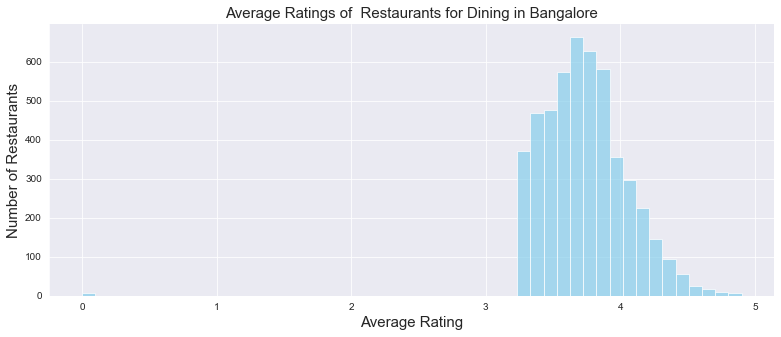

In [43]:
# Ratings
plt.figure(figsize=(13,5))
sns.set_style('darkgrid')
sns.distplot(df['Dining_Rating'], kde=False, bins = 50, color='skyblue', hist_kws={'alpha':0.7})
sns.despine()
plt.title("Average Ratings of  Restaurants for Dining in Bangalore", fontsize = 15)
plt.xlabel("Average Rating", fontsize = 15)
plt.ylabel("Number of Restaurants", fontsize = 15)
plt.show()

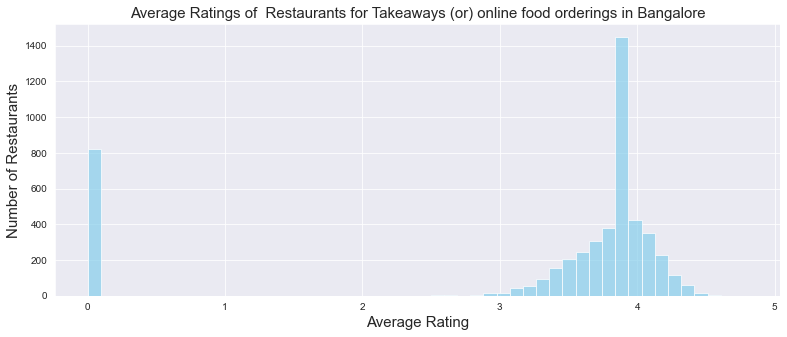

In [44]:
# Ratings
plt.figure(figsize=(13,5))
sns.set_style('darkgrid')
sns.distplot(df['Delivery_Rating'], kde=False, bins = 50, color='skyblue', hist_kws={'alpha':0.7})
plt.title("Average Ratings of  Restaurants for Takeaways (or) online food orderings in Bangalore", fontsize = 15)
plt.xlabel("Average Rating", fontsize = 15)
plt.ylabel("Number of Restaurants", fontsize = 15)
plt.show()

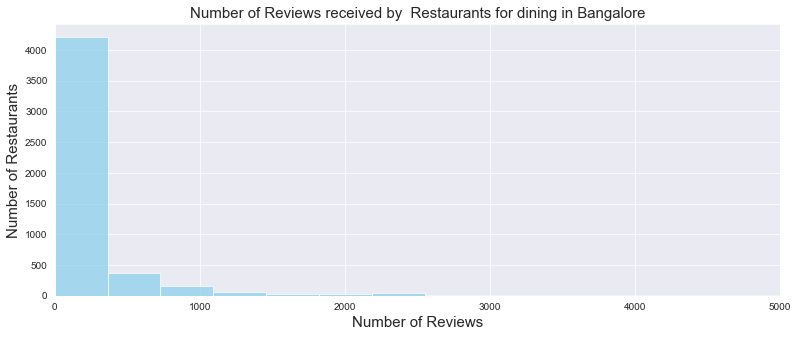

In [45]:
plt.figure(figsize=(13,5))
sns.set_style('darkgrid')
sns.distplot(df['Dining_Review_Count'], kde=False, bins = 70, color='skyblue', hist_kws={'alpha':0.7})
plt.title("Number of Reviews received by  Restaurants for dining in Bangalore", fontsize = 15)
plt.xlabel("Number of Reviews", fontsize = 15)
plt.ylabel("Number of Restaurants", fontsize = 15)
plt.xlim(0,5000)
plt.show()

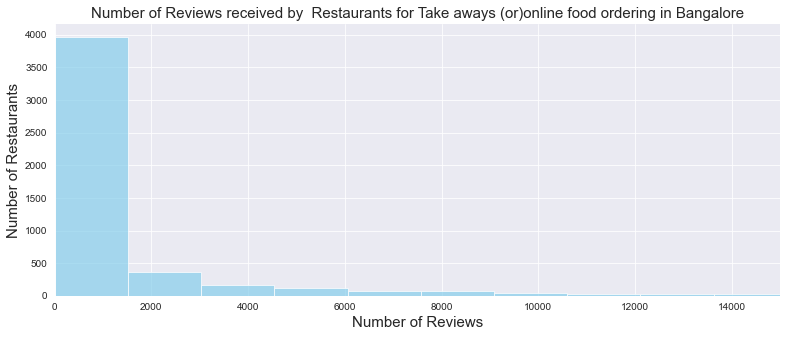

In [46]:
plt.figure(figsize=(13,5))
sns.set_style('darkgrid')
sns.distplot(df['Delivery_Rating_Count'], kde=False, bins = 50, color='skyblue', hist_kws={'alpha':0.7})
sns.despine()
plt.title("Number of Reviews received by  Restaurants for Take aways (or)online food ordering in Bangalore", fontsize = 15)
plt.xlim(0,15000)
plt.xlabel("Number of Reviews", fontsize = 15)
plt.ylabel("Number of Restaurants", fontsize = 15)
plt.show()

# Clustering

In [57]:
#Conducting the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values) 
    rand_X = sample(range(0, n, 1), m) 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1]) 
    HO = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HO):
        print(ujd, wjd)
        HO = 0
 
    return HO

In [58]:
rest_df.columns

Index(['index', 'Restaurant_Name', 'Category', 'Pricing_for_2', 'Locality',
       'Dining_Rating', 'Dining_Review_Count', 'Delivery_Rating',
       'Delivery_Rating_Count', 'Website', 'Address', 'Phone_No', 'Latitude',
       'Longitude', 'Locality_Score', 'Popularity_Score', 'Rating_Score'],
      dtype='object')

In [59]:
df1=rest_df[["Popularity_Score","Rating_Score","Pricing_for_2","Locality_Score"]]

In [60]:
# verify hopkins value 10 times/multiple times to make sure our data is well suited for clustering
for i in range(10):
    print(hopkins(df1))

0.9905057534279407
0.9902522852651121
0.9901508741559133
0.9881813729561015
0.9833188179815112
0.9841676527500106
0.990768756116704
0.9892026011428733
0.9906585900279652
0.9900658842387016


As Hopkins value ranges between 0.9 we can say data is suitable for clustering

# Model Fitting and predicting

In [304]:
rest_df.columns

Index(['index', 'Restaurant_Name', 'Category', 'Pricing_for_2', 'Locality',
       'Dining_Rating', 'Dining_Review_Count', 'Delivery_Rating',
       'Delivery_Rating_Count', 'Website', 'Address', 'Phone_No', 'Latitude',
       'Longitude', 'Category_num', 'Locality_Score', 'Popularity_Score',
       'Rating_Score', 'label'],
      dtype='object')

### Level 1 Clustering

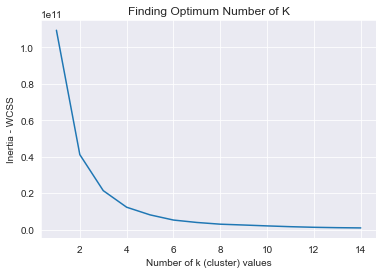

In [61]:
from sklearn.cluster import KMeans
x_df = rest_df[["Popularity_Score","Rating_Score"]] 
wcss = []
for k in range(1,15):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(x_df)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,15), wcss)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

In [62]:
kmean_x_data1 = KMeans(n_clusters=6, random_state=0)
clusters = kmean_x_data1.fit_predict(x_df)
rest_df["label"] = clusters
rest_df.head()

,index,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Locality_Score,Popularity_Score,Rating_Score,label
0,0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,"Indiranagar, Bangalore",4.9,2790.0,4.5,838.0,https://www.zomato.com/bangalore/burma-burma-i...,"607, Ground Floor, 12th Main, Hal 2nd Stage, I...",9.18043E+11,12.970394,77.644713,198,3628.0,4.70,4
1,1,Windmills Craftworks,"Continental, Fast Food, Kebab, Beverages, Ital...",2500,"Windmills Craftworks, Bangalore",4.9,6543.0,4.2,524.0,https://www.zomato.com/bangalore/windmills-cra...,"78, Immaine Epip Industrial Area, Whitefield B...",9.1888E+11,12.982413,77.721979,2,7067.0,4.55,2
2,2,CTR Shri Sagar,South Indian,150,"Malleshwaram, Bangalore",4.9,4837.0,4.3,22100.0,https://www.zomato.com/bangalore/ctr-shri-saga...,"7th Cross, Margosa Road, Malleshwaram, Bangalore",9.18023E+11,12.998270,77.569455,78,26937.0,4.60,5
3,3,Brahmin's Coffee Bar,South Indian,100,"Basavanagudi, Bangalore",4.9,2975.0,4.4,372.0,https://www.zomato.com/bangalore/brahmins-coff...,"Ranga Rao Road, Near Basavanagudi, Bangalore",9.19845E+11,12.954043,77.568865,74,3347.0,4.65,4
4,4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,"Indiranagar, Bangalore",4.9,2575.0,4.4,1180.0,https://www.zomato.com/bangalore/milano-ice-cr...,"460, 2nd Cross, Krishna Temple Road, Indiranag...",9.18041E+11,12.979121,77.644039,198,3755.0,4.65,4


In [302]:
rest_df.label.value_counts()

0    3830
4     724
2     289
1     116
5      36
3       8
Name: label, dtype: int64

In [311]:
724+289+116

1129

No handles with labels found to put in legend.


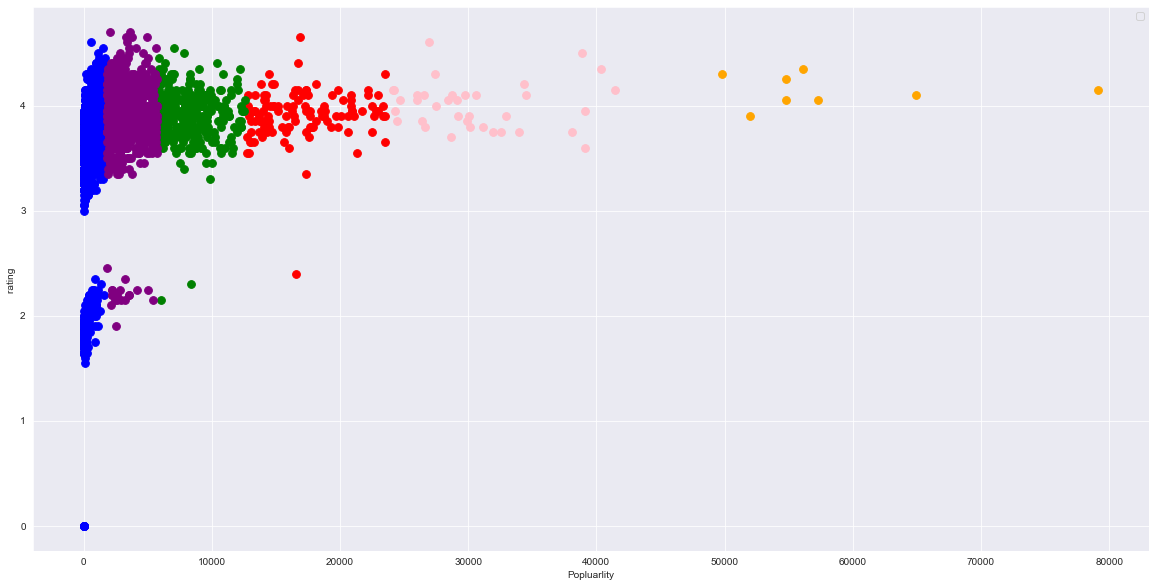

In [300]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter( rest_df["Popularity_Score"][rest_df.label == 0], rest_df["Rating_Score"][rest_df.label == 0], c='blue', s=60)
ax.scatter(rest_df["Popularity_Score"][rest_df.label == 1], rest_df["Rating_Score"][rest_df.label == 1], c='red', s=60)
ax.scatter( rest_df["Popularity_Score"][rest_df.label == 2], rest_df["Rating_Score"][rest_df.label == 2], c='green', s=60)
ax.scatter( rest_df["Popularity_Score"][rest_df.label == 3], rest_df["Rating_Score"][rest_df.label == 3], c='orange', s=60)
ax.scatter( rest_df["Popularity_Score"][rest_df.label == 4], rest_df["Rating_Score"][rest_df.label == 4], c='purple', s=60)
ax.scatter( rest_df["Popularity_Score"][rest_df.label == 5], rest_df["Rating_Score"][rest_df.label == 5], c='pink', s=60)
#ax.scatter(kmean_x_data1.cluster_centers_[:,0], kmean_x_data1.cluster_centers_[:,1],kmean_x_data1.cluster_centers_[:,2],kmean_x_data1.cluster_centers_[:,3],color="black", label="Centroids",marker='*',s =90)
#ax.view_init(30, 185)
plt.legend()
plt.xlabel("Popluarlity")
plt.ylabel("rating ")
#ax.set_zlabel('delivery_rating ')
plt.show()

In [321]:
(rest_df.label == (4 or 2 or 1)).sum()

724

In [332]:
filter_df4 = rest_df[rest_df.label ==4]
filter_df2 = rest_df[rest_df.label ==2]
filter_df1 = rest_df[rest_df.label ==1]

In [339]:
filter_df = pd.concat([filter_df4,filter_df2,filter_df1])

In [342]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129 entries, 0 to 4323
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  1129 non-null   int64  
 1   Restaurant_Name        1129 non-null   object 
 2   Category               1129 non-null   object 
 3   Pricing_for_2          1129 non-null   int64  
 4   Locality               1129 non-null   object 
 5   Dining_Rating          1129 non-null   float64
 6   Dining_Review_Count    1129 non-null   float64
 7   Delivery_Rating        1129 non-null   float64
 8   Delivery_Rating_Count  1129 non-null   float64
 9   Website                1129 non-null   object 
 10  Address                1129 non-null   object 
 11  Phone_No               1129 non-null   object 
 12  Latitude               1129 non-null   float64
 13  Longitude              1129 non-null   float64
 14  Category_num           1129 non-null   int64  
 15  Loca

In [343]:
filter_df.columns

Index(['index', 'Restaurant_Name', 'Category', 'Pricing_for_2', 'Locality',
       'Dining_Rating', 'Dining_Review_Count', 'Delivery_Rating',
       'Delivery_Rating_Count', 'Website', 'Address', 'Phone_No', 'Latitude',
       'Longitude', 'Category_num', 'Locality_Score', 'Popularity_Score',
       'Rating_Score', 'label'],
      dtype='object')

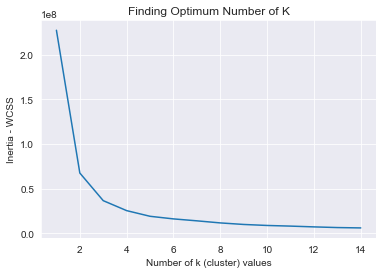

In [346]:
from sklearn.cluster import KMeans
x_df = filter_df[["Pricing_for_2","Locality_Score"]] 
wcss = []
for k in range(1,15):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(x_df)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,15), wcss)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

In [348]:
kmean_x_data1 = KMeans(n_clusters=4, random_state=0)
clusters = kmean_x_data1.fit_predict(x_df)
filter_df["label2"] = clusters
filter_df.head()

,index,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Category_num,Locality_Score,Popularity_Score,Rating_Score,label,label2
0,0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,"Indiranagar, Bangalore",4.9,2790.0,4.5,838.0,https://www.zomato.com/bangalore/burma-burma-i...,"607, Ground Floor, 12th Main, Hal 2nd Stage, I...",9.18043E+11,12.970394,77.644713,10,198,3628.0,4.70,4,3
3,3,Brahmin's Coffee Bar,South Indian,100,"Basavanagudi, Bangalore",4.9,2975.0,4.4,372.0,https://www.zomato.com/bangalore/brahmins-coff...,"Ranga Rao Road, Near Basavanagudi, Bangalore",9.19845E+11,12.954043,77.568865,2,74,3347.0,4.65,4,0
4,4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,"Indiranagar, Bangalore",4.9,2575.0,4.4,1180.0,https://www.zomato.com/bangalore/milano-ice-cr...,"460, 2nd Cross, Krishna Temple Road, Indiranag...",9.18041E+11,12.979121,77.644039,4,198,3755.0,4.65,4,0
5,5,BelgYum,Desserts,400,"Phoenix Marketcity Bangalore, Whitefield, Ban...",4.9,1858.0,0.0,0.0,https://www.zomato.com/bangalore/belgyum-white...,"16 106/107, 1st Floor, Pheonix Market City, Ma...",9.18067E+11,12.997632,77.696821,1,11,1858.0,2.45,4,0
9,9,Pasta Street,"Italian, European, Pizza, Pasta, Salad, Desser...",1500,"Koramangala 4th Block, Bangalore",4.8,1842.0,4.1,1252.0,https://www.zomato.com/bangalore/pasta-street-...,"751, 80 Feet Road, Opposite SBI Bank, Koramang...",9.18044E+11,12.932967,77.631118,7,30,3094.0,4.45,4,3


No handles with labels found to put in legend.


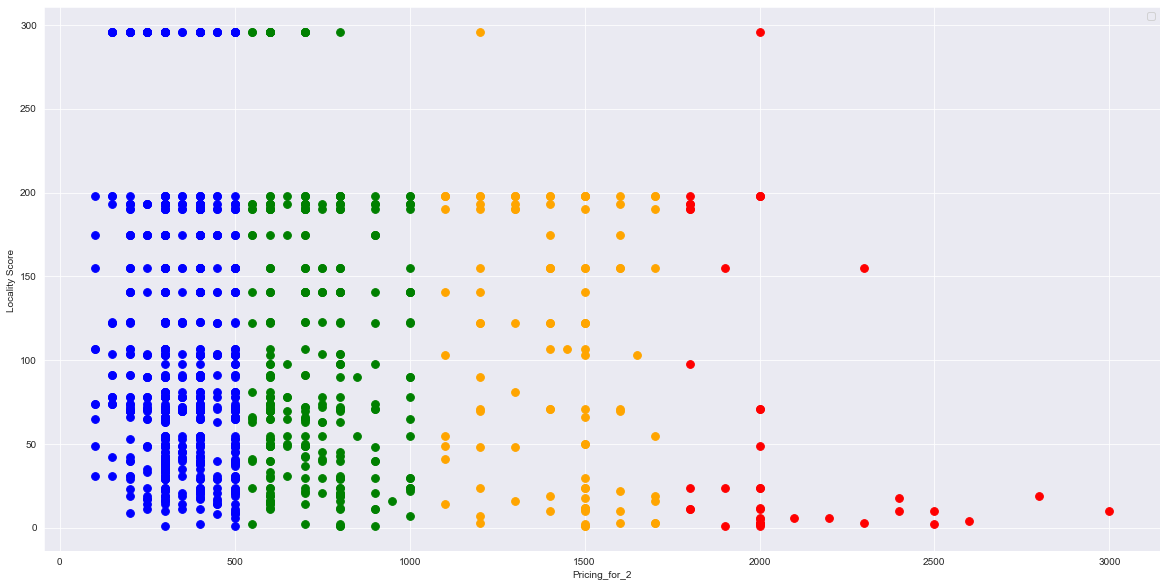

In [352]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter( filter_df["Pricing_for_2"][filter_df.label2 == 0], filter_df["Locality_Score"][filter_df.label2 == 0], c='blue', s=60)
ax.scatter(filter_df["Pricing_for_2"][filter_df.label2 == 1], filter_df["Locality_Score"][filter_df.label2 == 1], c='red', s=60)
ax.scatter( filter_df["Pricing_for_2"][filter_df.label2 == 2], filter_df["Locality_Score"][filter_df.label2 == 2], c='green', s=60)
ax.scatter( filter_df["Pricing_for_2"][filter_df.label2 == 3], filter_df["Locality_Score"][filter_df.label2 == 3], c='orange', s=60)
#ax.scatter( filter_df["Pricing_for_2"][filter_df.label2 == 4], filter_df["Locality_Score"][filter_df.label2 == 4], c='purple', s=60)
#ax.scatter( filter_df["Pricing_for_2"][filter_df.label2 == 5], filter_df["Locality_Score"][filter_df.label2 == 5], c='pink', s=60)
#ax.scatter(kmean_x_data1.cluster_centers_[:,0], kmean_x_data1.cluster_centers_[:,1],kmean_x_data1.cluster_centers_[:,2],kmean_x_data1.cluster_centers_[:,3],color="black", label2="Centroids",marker='*',s =90)
#ax.view_init(30, 185)
plt.legend()
plt.xlabel("Pricing_for_2")
plt.ylabel("Locality Score ")
#ax.set_zlabel2('delivery_rating ')
plt.show()

In [353]:
filter_df.label2.value_counts()

0    694
2    294
3    100
1     41
Name: label2, dtype: int64

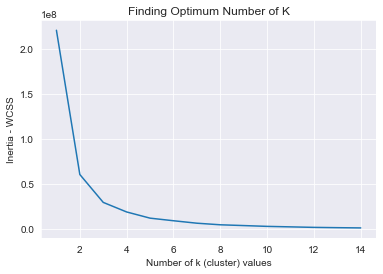

In [354]:
from sklearn.cluster import KMeans
x_df = filter_df[["Pricing_for_2","Rating_Score"]] 
wcss = []
for k in range(1,15):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(x_df)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,15), wcss)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

In [355]:
kmean_x_data1 = KMeans(n_clusters=4, random_state=0)
clusters = kmean_x_data1.fit_predict(x_df)
filter_df["label3"] = clusters
filter_df.head()

,index,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,...,Phone_No,Latitude,Longitude,Category_num,Locality_Score,Popularity_Score,Rating_Score,label,label2,label3
0,0,Burma Burma,"Asian, Burmese, Bubble Tea, Salad, Tea, Desser...",1500,"Indiranagar, Bangalore",4.9,2790.0,4.5,838.0,https://www.zomato.com/bangalore/burma-burma-i...,...,9.18043E+11,12.970394,77.644713,10,198,3628.0,4.70,4,3,1
3,3,Brahmin's Coffee Bar,South Indian,100,"Basavanagudi, Bangalore",4.9,2975.0,4.4,372.0,https://www.zomato.com/bangalore/brahmins-coff...,...,9.19845E+11,12.954043,77.568865,2,74,3347.0,4.65,4,0,0
4,4,Milano Ice Cream,"Desserts, Ice Cream, Beverages",400,"Indiranagar, Bangalore",4.9,2575.0,4.4,1180.0,https://www.zomato.com/bangalore/milano-ice-cr...,...,9.18041E+11,12.979121,77.644039,4,198,3755.0,4.65,4,0,0
5,5,BelgYum,Desserts,400,"Phoenix Marketcity Bangalore, Whitefield, Ban...",4.9,1858.0,0.0,0.0,https://www.zomato.com/bangalore/belgyum-white...,...,9.18067E+11,12.997632,77.696821,1,11,1858.0,2.45,4,0,0
9,9,Pasta Street,"Italian, European, Pizza, Pasta, Salad, Desser...",1500,"Koramangala 4th Block, Bangalore",4.8,1842.0,4.1,1252.0,https://www.zomato.com/bangalore/pasta-street-...,...,9.18044E+11,12.932967,77.631118,7,30,3094.0,4.45,4,3,1


No handles with labels found to put in legend.


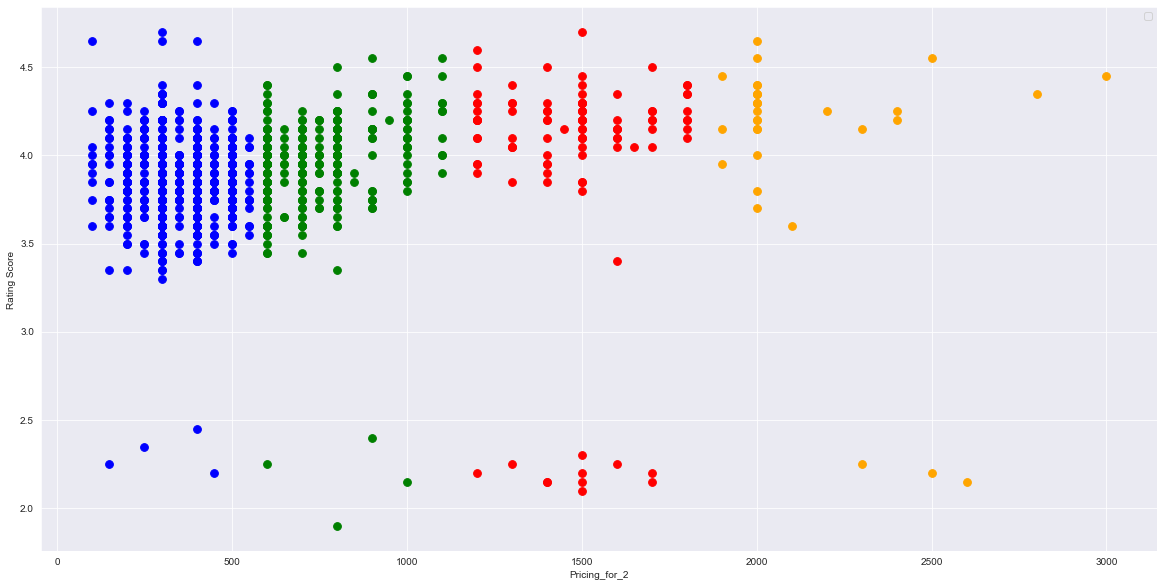

In [356]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter( filter_df["Pricing_for_2"][filter_df.label3 == 0], filter_df["Rating_Score"][filter_df.label3 == 0], c='blue', s=60)
ax.scatter(filter_df["Pricing_for_2"][filter_df.label3 == 1], filter_df["Rating_Score"][filter_df.label3 == 1], c='red', s=60)
ax.scatter( filter_df["Pricing_for_2"][filter_df.label3 == 2], filter_df["Rating_Score"][filter_df.label3 == 2], c='green', s=60)
ax.scatter( filter_df["Pricing_for_2"][filter_df.label3 == 3], filter_df["Rating_Score"][filter_df.label3 == 3], c='orange', s=60)
#ax.scatter( filter_df["Pricing_for_2"][filter_df.label3 == 4], filter_df["Rating_Score"][filter_df.label3 == 4], c='purple', s=60)
#ax.scatter( filter_df["Pricing_for_2"][filter_df.label3 == 5], filter_df["Rating_Score"][filter_df.label3 == 5], c='pink', s=60)
#ax.scatter(kmean_x_data1.cluster_centers_[:,0], kmean_x_data1.cluster_centers_[:,1],kmean_x_data1.cluster_centers_[:,2],kmean_x_data1.cluster_centers_[:,3],color="black", label3="Centroids",marker='*',s =90)
#ax.view_init(30, 185)
plt.legend()
plt.xlabel("Pricing_for_2")
plt.ylabel("Rating Score ")
#ax.set_zlabel3('delivery_rating ')
plt.show()

In [357]:
filter_df.label3.value_counts()

0    712
2    286
1     99
3     32
Name: label3, dtype: int64

In [359]:
final_df2 = filter_df[filter_df.label3 ==2]
final_df1 = filter_df[filter_df.label3 ==1]

In [360]:
final_df = pd.concat([final_df2,final_df1])

In [368]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 13 to 38
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  385 non-null    int64  
 1   Restaurant_Name        385 non-null    object 
 2   Category               385 non-null    object 
 3   Pricing_for_2          385 non-null    int64  
 4   Locality               385 non-null    object 
 5   Dining_Rating          385 non-null    float64
 6   Dining_Review_Count    385 non-null    float64
 7   Delivery_Rating        385 non-null    float64
 8   Delivery_Rating_Count  385 non-null    float64
 9   Website                385 non-null    object 
 10  Address                385 non-null    object 
 11  Phone_No               385 non-null    object 
 12  Latitude               385 non-null    float64
 13  Longitude              385 non-null    float64
 14  Category_num           385 non-null    int64  
 15  Locali

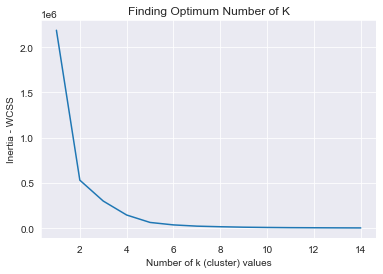

In [361]:
from sklearn.cluster import KMeans
x_df = final_df[["Locality_Score","Rating_Score"]] 
wcss = []
for k in range(1,15):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(x_df)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,15), wcss)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

In [369]:
kmean_x_data1 = KMeans(n_clusters=3, random_state=0)
clusters = kmean_x_data1.fit_predict(x_df)
final_df["label4"] = clusters
final_df.head()

,index,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,...,Latitude,Longitude,Category_num,Locality_Score,Popularity_Score,Rating_Score,label,label2,label3,label4
13,13,Brik Oven,"Cafe, Italian, Fast Food, Desserts",1000,"Church Street, Bangalore",4.8,2798.0,4.1,543.0,https://www.zomato.com/bangalore/brik-oven-chu...,...,12.974725,77.605412,5,24,3341.0,4.45,4,2,2,0
27,27,SMOOR,"Italian, Thai, Pizza, Fast Food, Desserts, Bev...",900,"Indiranagar, Bangalore",4.7,2086.0,4.4,3577.0,https://www.zomato.com/bangalore/smoor-2-indir...,...,12.969931,77.641421,7,198,5663.0,4.55,4,2,2,1
29,29,Here & Now,"Cafe, American, Burger, Sandwich, Desserts, Be...",900,"HSR, Bangalore",4.7,1869.0,4.0,304.0,https://www.zomato.com/bangalore/here-now-hsr,...,12.913569,77.638203,6,193,2173.0,4.35,4,2,2,1
47,47,The Pizza Bakery - Brew & Eatery,"Pizza, Italian, Desserts, Beverages",1000,"Indiranagar, Bangalore",4.6,2497.0,4.3,2526.0,https://www.zomato.com/bangalore/the-pizza-bak...,...,12.970330,77.644672,4,198,5023.0,4.45,4,2,2,1
49,49,Phobidden Fruit,"Vietnamese, Desserts, Thai",1100,"Indiranagar, Bangalore",4.5,3184.0,4.4,252.0,https://www.zomato.com/bangalore/phobidden-fru...,...,12.970068,77.639660,3,198,3436.0,4.45,4,3,2,1


No handles with labels found to put in legend.


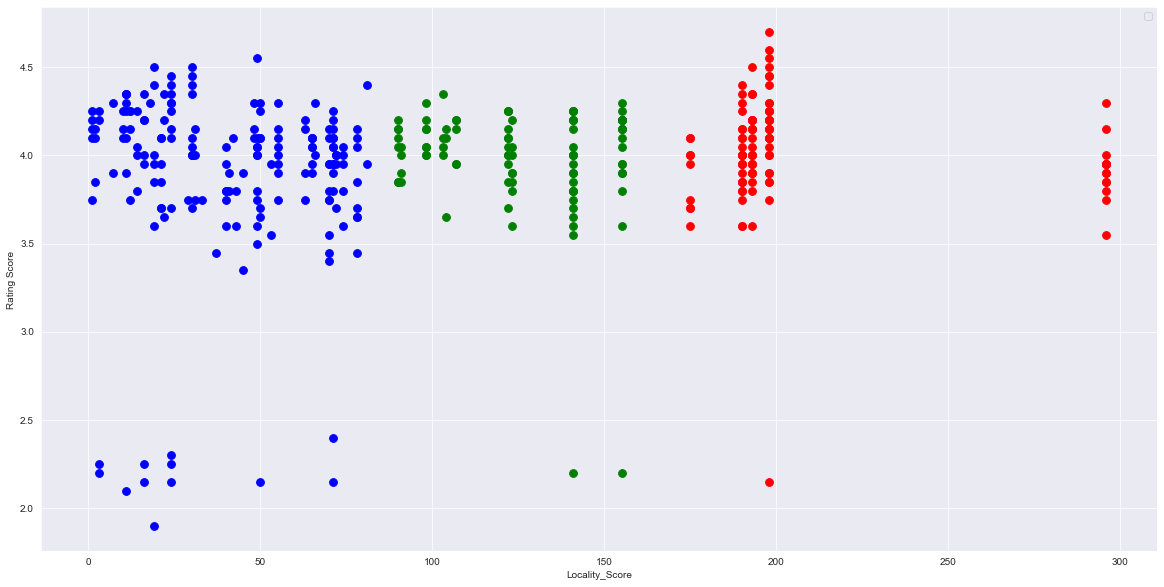

In [370]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter( final_df["Locality_Score"][final_df.label4 == 0], final_df["Rating_Score"][final_df.label4 == 0], c='blue', s=60)
ax.scatter(final_df["Locality_Score"][final_df.label4 == 1], final_df["Rating_Score"][final_df.label4 == 1], c='red', s=60)
ax.scatter( final_df["Locality_Score"][final_df.label4 == 2], final_df["Rating_Score"][final_df.label4 == 2], c='green', s=60)
#ax.scatter( final_df["Locality_Score"][final_df.label4 == 3], final_df["Rating_Score"][final_df.label4 == 3], c='orange', s=60)
#ax.scatter( final_df["Locality_Score"][final_df.label4 == 4], final_df["Locality_Score"][final_df.label4 == 4], c='purple', s=60)
#ax.scatter( final_df["Locality_Score"][final_df.label4 == 5], final_df["Locality_Score"][final_df.label4 == 5], c='pink', s=60)
#ax.scatter(kmean_x_data1.cluster_centers_[:,0], kmean_x_data1.cluster_centers_[:,1],kmean_x_data1.cluster_centers_[:,2],kmean_x_data1.cluster_centers_[:,3],color="black", label4="Centroids",marker='*',s =90)
#ax.view_init(30, 185)
plt.legend()
plt.xlabel("Locality_Score")
plt.ylabel("Rating Score ")
#ax.set_zlabel4('delivery_rating ')
plt.show()

In [371]:
final_df.label4.value_counts()

0    184
1    105
2     96
Name: label4, dtype: int64

In [372]:
selected_df2 = final_df[final_df.label4 ==2]
selected_df1 = final_df[final_df.label4 ==1]

In [373]:
selected_df = pd.concat([selected_df2,selected_df1])

In [379]:
selected_df.columns

Index(['index', 'Restaurant_Name', 'Category', 'Pricing_for_2', 'Locality',
       'Dining_Rating', 'Dining_Review_Count', 'Delivery_Rating',
       'Delivery_Rating_Count', 'Website', 'Address', 'Phone_No', 'Latitude',
       'Longitude', 'Category_num', 'Locality_Score', 'Popularity_Score',
       'Rating_Score', 'label', 'label2', 'label3', 'label4'],
      dtype='object')

In [382]:
selected_df.describe()[['Pricing_for_2','Dining_Rating','Dining_Review_Count', 'Delivery_Rating',
       'Delivery_Rating_Count']]

,Pricing_for_2,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count
count,201.000000,201.000000,201.000000,201.000000,201.000000
mean,957.213930,4.156219,1497.263682,3.859701,3938.517413
std,354.556341,0.295928,1759.056769,0.532652,4502.253610
min,600.000000,3.400000,6.000000,0.000000,0.000000
25%,700.000000,4.000000,348.000000,3.800000,966.000000
50%,800.000000,4.200000,864.000000,3.900000,2350.000000
75%,1200.000000,4.400000,2249.000000,4.100000,4911.000000
max,1800.000000,4.900000,16300.000000,4.500000,20800.000000


In [390]:
restaurant_list = selected_df[['Restaurant_Name','Address']]

In [391]:
restaurant_list.to_excel("restaurant_zomato.xlsx")

In [392]:
selected_df.Locality.value_counts()

 Indiranagar, Bangalore          32
 Whitefield, Bangalore           25
 HSR, Bangalore                  24
 JP Nagar, Bangalore             21
 Marathahalli, Bangalore         16
 BTM, Bangalore                  15
 Sarjapur Road, Bangalore        12
 Electronic City, Bangalore       9
 Jayanagar, Bangalore             8
 Kalyan Nagar, Bangalore          8
 Yelahanka, Bangalore             8
 Bannerghatta Road, Bangalore     7
 New BEL Road, Bangalore          5
 Vijay Nagar, Bangalore           4
 Rajajinagar, Bangalore           4
 Banashankari, Bangalore          3
Name: Locality, dtype: int64